## Warning:

There may be a few dataframes that are so large that the person running this code will have computer-memory issues.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_array

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning);

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score

from random import choices

import pickle

In [3]:
with open('model_base.pkl', 'rb') as f: #reading bytes
    foo = pickle.load(f)

In [4]:
foo.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('tvec',
                 TfidfVectorizer(lowercase=False, max_df=0.95, min_df=0.0,
                                 ngram_range=(1, 2))),
                ('lr',
                 LogisticRegression(class_weight={0: 0.8, 1: 3, 2: 6},
                                    max_iter=3000,
                                    multi_class='multinomial'))])>

In [5]:
df = pd.read_csv('../data/cleaned_02_ii.csv')
print(df.shape)
df.head()

(39565, 60)


,platform,text,hate_speech_score,target_race_asian,target_race_black,target_race_latinx,target_race_middle_eastern,target_race_native_american,target_race_pacific_islander,target_race_white,...,target_disability_neurological,target_disability_visually_impaired,target_disability_hearing_impaired,target_disability_unspecific,target_disability_other,target_disability,hate_rank,capital_sentance,cleaned_text,wc_cleaned_text
0,0,White people are trash.,0.46,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,white peopl are trash,4
1,0,"You've caught the big gay, it's known to be ai...",0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,you ve caught the big gay it s known to be air...,14
2,0,"I'm not saying you said that, I'm just saying ...",-1.29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,i m not say you said that i m just say that if...,75
3,0,Donald Trump. Yeet myself off a building onto ...,-0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,donald trump yeet myself off a build onto a ga...,20
4,0,Fabrice Fabrice is ostensibly black or black/l...,-2.84,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,fabric fabric is ostens black or black latino ...,19


In [6]:
#A bit redundant, but would like to make sure everything is as expected before continuing.

X = df['cleaned_text']
y = df['hate_rank']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 3785, #To have a clean 200 2s in the test 3785 pref
                                                    random_state = 26, #I like this number
                                                    stratify=y) #Particularly important in this case with 3 targets

# Hmm, as it stands right now y_test has mostly 0s... eh, I think htat's fine as it's like new data. So, cvs might be a little
# scruff now with seeing thet sam thing,b ut eh, better htan nothing.... And, likely such is the inhernt issue of
# using such methodologies...

In [7]:
len(y_test[y_test==2])

200

In [8]:
X_test

11319                                          white trash
5256     ugh i m not say they re the sourc i said they ...
16919                    latina on their way to school url
39197    awesom group of athlet and i do support their ...
35367    befor i forget they rape littil boy 2 in europ...
                               ...                        
20521    march onward racist too becaus we don t like a...
30163    thandiswa mawisa a black person is abl to say ...
25834    cold hoe that s a must bitch bodi a plu bitch ...
2808             you guy realli are a bunch of faggot here
4976         they re cross the border illeg they re crimin
Name: cleaned_text, Length: 3785, dtype: object

In [9]:
y_test

11319    0
5256     0
16919    0
39197    0
35367    0
        ..
20521    0
30163    0
25834    0
2808     1
4976     0
Name: hate_rank, Length: 3785, dtype: int64

In [10]:
data = pd.DataFrame(X_train)
data['hate_rank'] = y_train
data.head()

,cleaned_text,hate_rank
33114,yea those lino do need to be turn straight bec...,1
36787,the world is come un kill billion of peopl nw ...,0
4386,grant all thot are gone except you you are the...,1
36692,i m atheist but my famili is christian,0
24323,norballin hpluckros but again by place such a ...,0


In [11]:
data.iloc[0,0]

'yea those lino do need to be turn straight becaus in natur male may fuck everi like veri veri rare but they would fuck a femal not matter what gay is actual not a thing in real life anim can t be gay technic human can t but from some reason we think we can do anyth and defin mother natur also i don t think it gey ppl fault that wa a bit much'

In [12]:
data_names = []
for i in range(3):
    data_names.append(f"data_{i}")
data_names

['data_0', 'data_1', 'data_2']

In [13]:
col_size = 4000
for i in range(len(data_names)):#Recall that we're still planning on doing replace=True even for 0.
    data_names[i] = data[data['hate_rank']==i].sample(col_size, replace=True, random_state=26)

In [14]:
data = pd.concat(data_names)
print(data.shape)
data.head()

(12000, 2)


,cleaned_text,hate_rank
9021,i doubt satan ha ani author to bargain with go...,0
10138,how are there still peopl in 2019 who think th...,0
7384,i never said becom a minor holi shit i just wa...,0
7309,if she can perform the part well she wa a good...,0
7534,jesu that a name i havent heard in a long time...,0


In [15]:
X_train = data['cleaned_text']
y_train = data['hate_rank']

In [16]:
tfidf_base = foo[0]
X_train_tfidf = tfidf_base.fit_transform(X_train)
X_test_tfidf = tfidf_base.transform(X_test)

#Hmm, I wonder what I did; eh, just takes up a lot of memory...; but recall that we'll use it later.
X_train_base = pd.DataFrame(X_train_tfidf.todense(),
                          columns=tfidf_base.get_feature_names_out())
X_test_base = pd.DataFrame(X_test_tfidf.todense(),
                          columns=tfidf_base.get_feature_names_out())

In [17]:
# X_train_base.sum().sort_values().tail(30).plot(kind="barh");

In [18]:
# trial_model.named_steps['lr'].coef_[0]

In [19]:
# trial_model.named_steps['tvec'].get_feature_names_out()

In [20]:
def custom_recall(y, ypred, weight_list):   
    num = 0
    recall_base = recall_score(y, ypred, average=None)[1:]
    for i in range(len(weight_list)):
        num += recall_base[i] * weight_list[i]
    return num/sum(weight_list)

In [21]:
current_weights={
    0:.8
    ,1:3
    ,2:6
}
cw_values = list(current_weights.values())[1:]
print(cw_values)

[3, 6]


In [22]:
# pipe = Pipeline([
#     ('tvec', TfidfVectorizer(lowercase=False))
#     ,('lr', LogisticRegression(max_iter=3000, multi_class='multinomial', class_weight=current_weights))
# ])
# pipe_params = {'tvec__min_df' : [.0]
#                ,'tvec__max_df' : [.95]
#                ,'tvec__ngram_range' : [(1,2)]
#                ,'tvec__max_features' : [None]
#                ,'tvec__stop_words' : [None]
#                }
# scorer = make_scorer(custom_recall, weight_list=cw_values[1:]) #Note the 1: as we're now ignoring 0 for the scoring
# gs = GridSearchCV(pipe
#                   ,param_grid=pipe_params
#                   ,cv=5
#                   ,scoring=scorer
#                  )

# gs.fit(X_train, y_train)

# print(gs.score(X_train, y_train), gs.score(X_test, y_test))
# print(gs.best_score_)
# print(gs.best_params_)

0.9036666666666666 0.4501981505944518


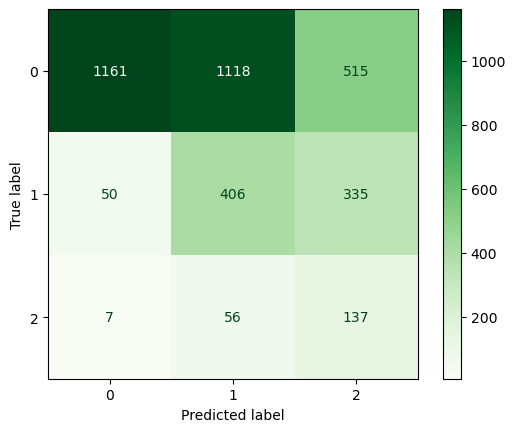

In [23]:
trial_model = foo #Should change the code later.... but eh
trial_model.fit(X_train,y_train)
print(trial_model.score(X_train, y_train), trial_model.score(X_test, y_test))

preds = trial_model.predict(X_test)
preds_prob = trial_model.predict_proba(X_test)
hyper_pred_comparer = pd.DataFrame({
    'cleaned_text':X_test
    ,'actual':y_test
    ,'pred':preds
    ,'p_0':preds_prob[:,0]
    ,'p_1':preds_prob[:,1]
    ,'p_2':preds_prob[:,2]
})

ConfusionMatrixDisplay.from_estimator(trial_model,X_test,y_test, cmap='Greens');

In [24]:
custom_recall(y_test, preds, cw_values)

0.6277581120943954

Fine, now let's continue from where we last left off:
1) Combine other fields:<br>
Platform<br>
Capital Sentance<br>
WC Cleaned Text<br>
<br>
2) Test if they're any good

Yeah, those are the next steps. Then, afterwards, we do the epic:<br>
3) Make the code to gauge comments...
3.5) Included in that is multiple comments, ie track it
3.55) So perhaps make a list of comments to take. Or a dictionary with the number of times

4) I'm guessed the app might be a bit differnt...

5) Forests

6) Presentation

So, let's do at least the first one before we take a break

In [25]:
df.columns#Phew, all of the ones we'll be using are on here.

Index(['platform', 'text', 'hate_speech_score', 'target_race_asian',
       'target_race_black', 'target_race_latinx', 'target_race_middle_eastern',
       'target_race_native_american', 'target_race_pacific_islander',
       'target_race_white', 'target_race_other', 'target_race',
       'target_religion_atheist', 'target_religion_buddhist',
       'target_religion_christian', 'target_religion_hindu',
       'target_religion_jewish', 'target_religion_mormon',
       'target_religion_muslim', 'target_religion_other', 'target_religion',
       'target_origin_immigrant', 'target_origin_migrant_worker',
       'target_origin_specific_country', 'target_origin_undocumented',
       'target_origin_other', 'target_origin', 'target_gender_men',
       'target_gender_non_binary', 'target_gender_transgender_men',
       'target_gender_transgender_unspecified',
       'target_gender_transgender_women', 'target_gender_women',
       'target_gender_other', 'target_gender', 'target_sexuality_bisexua

In [26]:
# X_train_base

In [27]:
X_test[:5]

11319                                          white trash
5256     ugh i m not say they re the sourc i said they ...
16919                    latina on their way to school url
39197    awesom group of athlet and i do support their ...
35367    befor i forget they rape littil boy 2 in europ...
Name: cleaned_text, dtype: object

In [28]:
y_test[:5]

11319    0
5256     0
16919    0
39197    0
35367    0
Name: hate_rank, dtype: int64

In [29]:
len(y_test[y_test==2])

200

In [30]:
len(df['text'].unique())

39565

In [31]:
df_test = pd.concat([X_test, y_test], axis=1)
df_test

,cleaned_text,hate_rank
11319,white trash,0
5256,ugh i m not say they re the sourc i said they ...,0
16919,latina on their way to school url,0
39197,awesom group of athlet and i do support their ...,0
35367,befor i forget they rape littil boy 2 in europ...,0
...,...,...
20521,march onward racist too becaus we don t like a...,0
30163,thandiswa mawisa a black person is abl to say ...,0
25834,cold hoe that s a must bitch bodi a plu bitch ...,0
2808,you guy realli are a bunch of faggot here,1


In [32]:
len(df_test[df_test['hate_rank']==2])

200

In [33]:
df.index

RangeIndex(start=0, stop=39565, step=1)

In [34]:
df_test = pd.merge(df_test,df,left_index=True,right_index=True)
df_test

,cleaned_text_x,hate_rank_x,platform,text,hate_speech_score,target_race_asian,target_race_black,target_race_latinx,target_race_middle_eastern,target_race_native_american,...,target_disability_neurological,target_disability_visually_impaired,target_disability_hearing_impaired,target_disability_unspecific,target_disability_other,target_disability,hate_rank_y,capital_sentance,cleaned_text_y,wc_cleaned_text
11319,white trash,0,0,white trash,0.44,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,white trash,2
5256,ugh i m not say they re the sourc i said they ...,0,0,"Ugh, I'm not saying they're the source, I said...",-1.47,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,ugh i m not say they re the sourc i said they ...,36
16919,latina on their way to school url,0,2,Latinas on their way to school URL,-3.19,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,latina on their way to school url,7
39197,awesom group of athlet and i do support their ...,0,3,Awesome group of athletes and i do support the...,-0.65,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,awesom group of athlet and i do support their ...,62
35367,befor i forget they rape littil boy 2 in europ...,0,3,Before i forget they rape littile boys 2 In eu...,-1.39,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,befor i forget they rape littil boy 2 in europ...,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20521,march onward racist too becaus we don t like a...,0,2,@Marching_Onward Racist too because we don't l...,-0.56,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,march onward racist too becaus we don t like a...,17
30163,thandiswa mawisa a black person is abl to say ...,0,2,"Thandiswa Mawisa, a black person is able to sa...",-0.45,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,thandiswa mawisa a black person is abl to say ...,24
25834,cold hoe that s a must bitch bodi a plu bitch ...,0,2,"Cold hoe that's a must, bitch body A plus, bit...",0.14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,cold hoe that s a must bitch bodi a plu bitch ...,13
2808,you guy realli are a bunch of faggot here,1,0,You guys really are a bunch of faggots here,1.60,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,you guy realli are a bunch of faggot here,9


In [35]:
df_test_f = df_test[['hate_rank_x','cleaned_text_x','text','platform','capital_sentance','wc_cleaned_text']]

In [36]:
df_test_f['hate_rank_x'].value_counts()

hate_rank_x
0    2794
1     791
2     200
Name: count, dtype: int64

In [37]:
df_test_f = df_test_f.rename(columns={"hate_rank_x":"hate_rank","cleaned_text_x":"cleaned_text"})
df_test_f

,hate_rank,cleaned_text,text,platform,capital_sentance,wc_cleaned_text
11319,0,white trash,white trash,0,0,2
5256,0,ugh i m not say they re the sourc i said they ...,"Ugh, I'm not saying they're the source, I said...",0,0,36
16919,0,latina on their way to school url,Latinas on their way to school URL,2,0,7
39197,0,awesom group of athlet and i do support their ...,Awesome group of athletes and i do support the...,3,0,62
35367,0,befor i forget they rape littil boy 2 in europ...,Before i forget they rape littile boys 2 In eu...,3,0,18
...,...,...,...,...,...,...
20521,0,march onward racist too becaus we don t like a...,@Marching_Onward Racist too because we don't l...,2,0,17
30163,0,thandiswa mawisa a black person is abl to say ...,"Thandiswa Mawisa, a black person is able to sa...",2,0,24
25834,0,cold hoe that s a must bitch bodi a plu bitch ...,"Cold hoe that's a must, bitch body A plus, bit...",2,0,13
2808,1,you guy realli are a bunch of faggot here,You guys really are a bunch of faggots here,0,0,9


In [38]:
df_test_f.shape #Phew, done with that done at least.

(3785, 6)

In [39]:
#Now onto test, which might be a bit harde as we have repetition.
df_train = pd.concat([X_train, y_train], axis=1)
df_train

,cleaned_text,hate_rank
9021,i doubt satan ha ani author to bargain with go...,0
10138,how are there still peopl in 2019 who think th...,0
7384,i never said becom a minor holi shit i just wa...,0
7309,if she can perform the part well she wa a good...,0
7534,jesu that a name i havent heard in a long time...,0
...,...,...
29394,fuck a hate ass bitch you can suck my dick,2
8363,fuck redneck and their goddamn hick whoop shut...,2
34801,that asshol need to check himself into a menta...,2
31085,thi make me mad as hell i hope someon stop thi...,2


In [40]:
df_train = pd.merge(df_train,df,left_index=True,right_index=True)
df_train

,cleaned_text_x,hate_rank_x,platform,text,hate_speech_score,target_race_asian,target_race_black,target_race_latinx,target_race_middle_eastern,target_race_native_american,...,target_disability_neurological,target_disability_visually_impaired,target_disability_hearing_impaired,target_disability_unspecific,target_disability_other,target_disability,hate_rank_y,capital_sentance,cleaned_text_y,wc_cleaned_text
6,point to poster ask for palestinian right and ...,0,0,\*points to posters asking for palestinian rig...,-0.77,0.0,0.0,0.0,0.333333,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,point to poster ask for palestinian right and ...,46
7,gurante at least one of these guy ha rape a wo...,1,0,Guranteed at least one of these guys has raped...,1.24,0.0,0.0,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,gurante at least one of these guy ha rape a wo...,16
7,gurante at least one of these guy ha rape a wo...,1,0,Guranteed at least one of these guys has raped...,1.24,0.0,0.0,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,gurante at least one of these guy ha rape a wo...,16
23,i m absolut for equal right for all peopl in m...,0,0,I'm absolutely for equal rights for all people...,-1.13,0.0,0.0,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,i m absolut for equal right for all peopl in m...,44
23,i m absolut for equal right for all peopl in m...,0,0,I'm absolutely for equal rights for all people...,-1.13,0.0,0.0,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,i m absolut for equal right for all peopl in m...,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39553,obnoxi illiter ebon bullshit video,1,3,Obnoxious illiterate ebonics bullshit video,1.32,0.0,1.0,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,obnoxi illiter ebon bullshit video,5
39560,good you american are annoy asf i wish more am...,2,3,Good you Americans are annoying asf. I Wish mo...,2.05,0.0,0.0,0.0,0.000000,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0,good you american are annoy asf i wish more am...,16
39561,go to street of the usa and our kid and vet an...,1,3,Go to streets of the USA and our kids and vets...,0.74,0.0,0.0,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,go to street of the usa and our kid and vet an...,20
39564,fuck you go die you fuck bitch ugli ass bitch,2,3,Fuck you go die you fucking bitch ugly ass bitch,2.43,0.0,0.0,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0,fuck you go die you fuck bitch ugli ass bitch,10


In [41]:
df_train_f = df_train[['hate_rank_x','cleaned_text_x','text','platform','capital_sentance','wc_cleaned_text']]
df_train_f

,hate_rank_x,cleaned_text_x,text,platform,capital_sentance,wc_cleaned_text
6,0,point to poster ask for palestinian right and ...,\*points to posters asking for palestinian rig...,0,0,46
7,1,gurante at least one of these guy ha rape a wo...,Guranteed at least one of these guys has raped...,0,0,16
7,1,gurante at least one of these guy ha rape a wo...,Guranteed at least one of these guys has raped...,0,0,16
23,0,i m absolut for equal right for all peopl in m...,I'm absolutely for equal rights for all people...,0,0,44
23,0,i m absolut for equal right for all peopl in m...,I'm absolutely for equal rights for all people...,0,0,44
...,...,...,...,...,...,...
39553,1,obnoxi illiter ebon bullshit video,Obnoxious illiterate ebonics bullshit video,3,0,5
39560,2,good you american are annoy asf i wish more am...,Good you Americans are annoying asf. I Wish mo...,3,0,16
39561,1,go to street of the usa and our kid and vet an...,Go to streets of the USA and our kids and vets...,3,0,20
39564,2,fuck you go die you fuck bitch ugli ass bitch,Fuck you go die you fucking bitch ugly ass bitch,3,0,10


In [42]:
df_train_f = df_train_f.rename(columns={"hate_rank_x":"hate_rank","cleaned_text_x":"cleaned_text"})
df_train_f

,hate_rank,cleaned_text,text,platform,capital_sentance,wc_cleaned_text
6,0,point to poster ask for palestinian right and ...,\*points to posters asking for palestinian rig...,0,0,46
7,1,gurante at least one of these guy ha rape a wo...,Guranteed at least one of these guys has raped...,0,0,16
7,1,gurante at least one of these guy ha rape a wo...,Guranteed at least one of these guys has raped...,0,0,16
23,0,i m absolut for equal right for all peopl in m...,I'm absolutely for equal rights for all people...,0,0,44
23,0,i m absolut for equal right for all peopl in m...,I'm absolutely for equal rights for all people...,0,0,44
...,...,...,...,...,...,...
39553,1,obnoxi illiter ebon bullshit video,Obnoxious illiterate ebonics bullshit video,3,0,5
39560,2,good you american are annoy asf i wish more am...,Good you Americans are annoying asf. I Wish mo...,3,0,16
39561,1,go to street of the usa and our kid and vet an...,Go to streets of the USA and our kids and vets...,3,0,20
39564,2,fuck you go die you fuck bitch ugli ass bitch,Fuck you go die you fucking bitch ugly ass bitch,3,0,10


In [43]:
df_train_f = df_train_f.reset_index()
df_test_f = df_test_f.reset_index()

In [44]:
#Great, we have the bases set up. Now, let's add their Tiffanys:
train_final = pd.concat([df_train_f, X_train_base], axis=1)
train_final = train_final.iloc[:,~train_final.columns.duplicated()]

In [45]:
test_final = pd.concat([df_test_f, X_test_base], axis=1)
test_final = test_final.iloc[:,~test_final.columns.duplicated()]

Hmm, eh, maybe I could have pipelined this too... Whatever, let's jsut get it done for now:
So, let us do the following steps:<br>
1) Rotate choosing a feature, ie drop all but that
2)Standard scale the model
3) Reevaluate metric

In [46]:
y_train, y_test = df_train_f['hate_rank'], df_test_f['hate_rank']#Need to redeclare as their order has changed

In [47]:
len(y_train), len(y_test)

(12000, 3785)

In [48]:
tfidf_base = foo[0]
ss = StandardScaler()
lr = LogisticRegression(max_iter=3000, multi_class='multinomial', class_weight=current_weights)

pot_columns = ['platform', 'capital_sentance', 'wc_cleaned_text']

In [49]:
train_final.columns

Index(['index', 'hate_rank', 'cleaned_text', 'text', 'platform',
       'capital_sentance', 'wc_cleaned_text', '00', '00 28', '00 reason',
       ...
       'zoophilia', 'zoophilia honestli', 'zshikhani', 'zshikhani hammam12121',
       'zugisland', 'zugisland chapotraphous', 'zwelinzima1',
       'zwelinzima1 terrorist', 'zzz', 'zzz you'],
      dtype='object', length=112183)

In [50]:
X_train = df_train_f['cleaned_text']
X_test = df_test_f['cleaned_text']

X_train = tfidf_base.fit_transform(X_train)
X_test = tfidf_base.transform(X_test)

lr.fit(X_train, y_train)
preds = lr.predict(X_test)
print(custom_recall(y_test, preds, cw_values))

0.629827222924568


In [51]:
passes = ['index','cleaned_text','text','platform','capital_sentance','wc_cleaned_text']

In [52]:
i = 'platform'
trial_size = 4000
X_train = train_final.drop(passes,axis=1)
X_test = test_final.drop(passes,axis=1)

X_train[i] = train_final[i]
X_test[i] = test_final[i]

X_train = X_train.sample(trial_size, random_state=26)
y_train = X_train['hate_rank']
X_train = X_train.drop(['hate_rank'], axis=1)
X_test = X_test.drop(['hate_rank'], axis=1)

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr.fit(X_train, y_train)
preds = lr.predict(X_test)
print(custom_recall(y_test, preds, cw_values))

0.4021702486304256


In [53]:
i = 'capital_sentance'
trial_size = 4000 #In case we change it
X_train = train_final.drop(passes,axis=1)
X_test = test_final.drop(passes,axis=1)

X_train[i] = train_final[i]
X_test[i] = test_final[i]

X_train = X_train.sample(trial_size, random_state=26)
y_train = X_train['hate_rank']
X_train = X_train.drop(['hate_rank'], axis=1)
X_test = X_test.drop(['hate_rank'], axis=1)

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr.fit(X_train, y_train)
preds = lr.predict(X_test)
print(custom_recall(y_test, preds, cw_values))

0.3997176569742941


In [54]:
i = 'wc_cleaned_text'
trial_size = 4000
X_train = train_final.drop(passes,axis=1)
X_test = test_final.drop(passes,axis=1)

X_train[i] = train_final[i]
X_test[i] = test_final[i]

X_train = X_train.sample(trial_size, random_state=26)
y_train = X_train['hate_rank']
X_train = X_train.drop(['hate_rank'], axis=1)
X_test = X_test.drop(['hate_rank'], axis=1)

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr.fit(X_train, y_train)
preds = lr.predict(X_test)
print(custom_recall(y_test, preds, cw_values))

0.3967678044669195


## Conclusion re. additional features

Well, we got it in the end...Unfortunately the addition of the other columns only made things worse. So, let us go back
and start the next phase: With our final selected model, let's explore relative probabilities of each class...